<h1 style='direction:rtl; text-align: right'>
روشن‌تر کردن تصویر تیره
</h1>
<p style='direction:rtl; text-align: right'>
برای روشن‌تر کردن عکس، از تبدیل لگاریتمی استفاده میکنیم.
در اینجا تاریکی تصویر به دلیل تاریکی محیط است و نه به دلیل خطای دستگاه عکاسی.
بنابرین تبدیل لگاریتمی انتخاب مناسب تری نسبت به تدیل گاما است.
همچنین برای انتخاب پایه مناسب برای تبدیل لگاریتمی،
از عددی استفاده میکنیم که تا جای ممکن، هیستوگرام عکس به مرکز متمایل شود.<br>
این عدد را با آزمون و خطا به دست می‌آوریم که در انتها، این آزمایش‌ها آورده شده است.
</p>



<p style='direction:rtl; text-align: right'>
ابتدا ایمپورت‌های لازم را انجام میدهیم.
</p>

In [1]:
import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt

%matplotlib inline

<p style='direction:rtl; text-align: right'>
در اینجا، تبدیل لگاریتمی را در تابع
<code>log_transform</code>
تعریف میکنیم که beta پایه لگاریتم است.
</p>
<p style='direction:rtl; text-align: right'>
در تابع
<code>optimize</code>
ابتدا به ازای هر یک از مقادیر ۰ تا ۲۵۵، مقدار متناظر آن در تبدیل را به دست می‌آوریم تا فرایند
تبدیل سریع‌تر انجام شود. سپس تبدیل را روی تصویر اعمال میکنیم.
</p>

In [2]:
def log_transform(beta):
    return lambda x: np.uint8(round(abs(math.log(float(x) / 255 * (beta - 1) + 1) / math.log(beta) * 255)))


def optimize(src, beta):
    func = np.arange(256)
    func = np.vectorize(log_transform(beta))(func)
    return func[src]

<p style='direction:rtl; text-align: right'>
تصویر را از فایل میخوانیم و آن را به فضای رنگی `RGB` می‌بریم. (این تبدیل صرفا برای نمایش با pyplot است.)
</p>

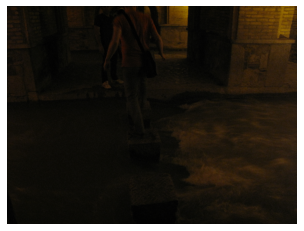

In [3]:
pic_orig = cv.imread('./data/Dark.jpg')
pic_orig = cv.cvtColor(pic_orig,cv.COLOR_BGR2RGB)
plt.imshow(pic_orig)
plt.axis('off')
plt.show()

<p style='direction:rtl; text-align: right'>
تابع
<code>optimize</code>
را روی آن با `beta=25` اعمال میکنیم.
</p>

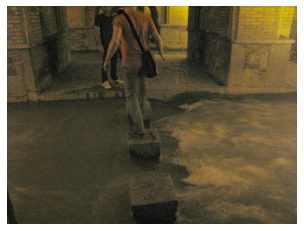

In [4]:
pic_res = optimize(pic_orig, 25)

plt.imshow(pic_res)
plt.axis('off')
plt.show()

<p style='direction:rtl; text-align: right'>
اما به دلیل نویز سنسور در نور کم و تشدید این اثر با تبدیل لگاریتمی،
تصویر دچار نویز salt and pepper می‌شود. برای از بین بردن آن، یک فیلتر median روی آن اعمال میکنیم.
</p>

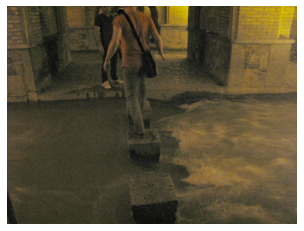

In [5]:
pic_res = cv.medianBlur(pic_res, 7)

plt.imshow(pic_res)
plt.axis('off')
plt.show()

<p style='direction:rtl; text-align: right'>
در نهایت نتیجه را در فایل ذخیره میکنیم.
</p>

In [6]:
plt.imsave('./out/res01.jpg', pic_res)

<h3 style='direction:rtl; text-align: right'>
آزمون و خطای به دست آوردن `beta`
</h3>

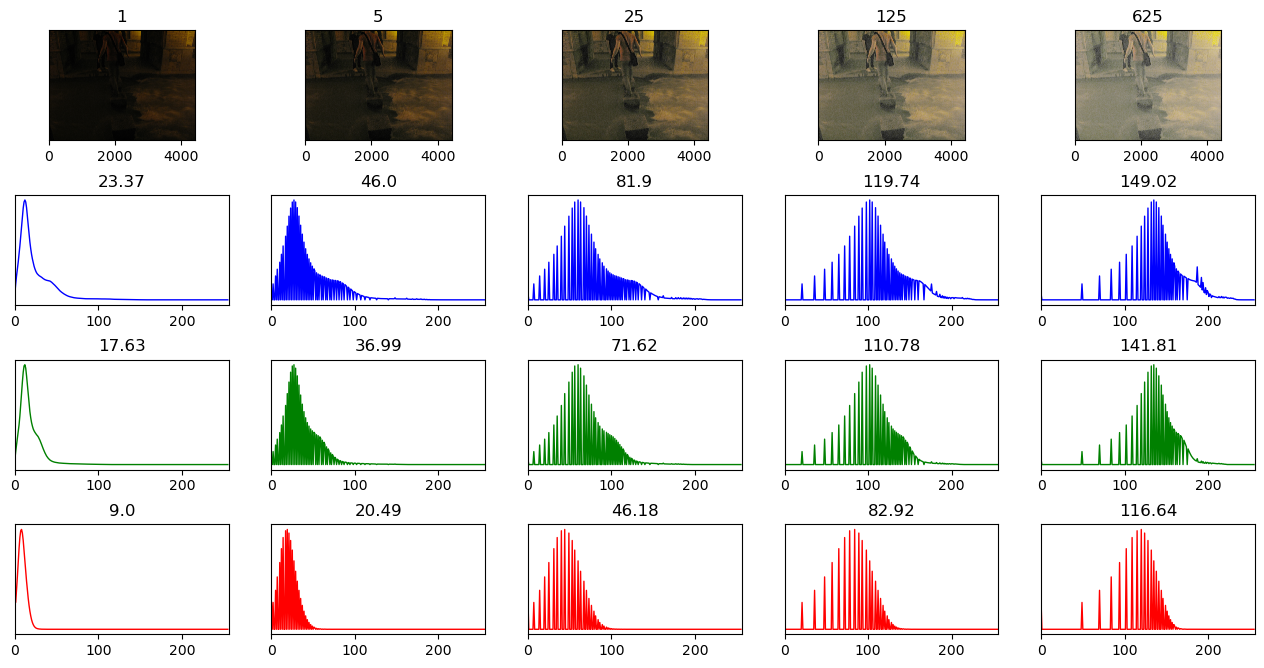

In [7]:
l = [5,25,125,625]
n = len(l)
pics = [(1,pic_orig)]
pics.extend([(b,optimize(pic_orig,b)) for b in l])

fig = plt.figure(figsize=(16,8),dpi=100)
gs = fig.add_gridspec(4, n+1,hspace=.5)
plts = gs.subplots()

for *i,p in np.ndenumerate(plts):
    p.get_yaxis().set_visible(False)
    p.set_yticklabels([])

color = ('b','g','r')
for i,pic in enumerate(pics):
    p = plts[0][i]
    p.imshow(pic[1])
    p.set_title(pic[0])

    for j,col in enumerate(color):
        histr = cv.calcHist([pic[1]],[j],None,[256],[0,256])
        plts[j+1][i].plot(histr,color = col,linewidth=1)
        plts[j+1][i].set_title(round(((histr * np.arange(256).reshape((256,1))).sum())/histr.sum(),2))
        plts[j+1][i].set_xlim([0,256])

plt.show()

<p style='direction:rtl; text-align: right'>
در بالای هر هیستوگرام، میانگین اینتنسیتی‌ها آورده شده است. در اینجا بتای ۲۵ هم هیستوگرام مطلوب و هم کیفیت مطلوبی دارد.
</p>